## **Exploratory Data Analysis (EDA) on for Resume Classification**  
## **Index**  

### **1. Introduction**  
#### Overview  
- [overview](#overview-of-the-dataset)  
- [Objective of the EDA](#objective-of-the-eda)  

### **2. Data Loading and Initial Exploration**  
#### Data Import & Structure  
- [Importing Required Libraries](#importing-required-libraries)  
- [Loading the Dataset](#loading-the-dataset)  
- [Previewing the Dataset](#previewing-the-dataset)  
- [Dataset Shape](#dataset-shape)  
- [Data Types Overview](#data-types-overview)  
- [Basic Statistical Summary](#basic-statistical-summary)  
- [Column Descriptions](#column-descriptions)  
- [Data Dictionary](#data-dictionary)  

### **3. Data Cleaning**  
#### Handling Issues  
- [Handling Missing Values](#handling-missing-values)  
- [Removing Duplicates](#removing-duplicates)  
- [Data Type Conversion](#data-type-conversion)  
- [Outlier Detection](#outlier-detection)  

### **4. Feature Engineering** 

### **5. Text Analysis**  

### **6. Key Insights from EDA**  



# **1. Introduction** 

## **Overview of the Dataset**

 Resume Screening and Classification with Natural Language Processing Improved A resume screener application that can be used to automatically categorize resumes in various subjects according to their content. The dataset of this project is a set of resumes that are stored as PDF documents, which are extracted into a structured CSV file 

## **Objective of the EDA**

# **2. Data Loading and Initial Exploration** 

## **Importing Required Libraries**

In [22]:
#import Warning

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\kuldeep
[nltk_data]     verma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Dictionary

**Text** : The full plain text extracted from each resume PDF. It may include education, experience, skills, etc

**Label** : he job category the resume belongs to. This is the target class for classification.

## **Loading the Dataset**

In [23]:
df = pd.read_csv("../data/processed/resume_data.csv")

## **Previewing the Dataset**

In [24]:
df.head()

resume_text    job_role
0  ACCOUNTANT\nSummary\nFinancial Accountant spec...  ACCOUNTANT
1  STAFF ACCOUNTANT\nSummary\nHighly analytical a...  ACCOUNTANT
2  ACCOUNTANT\nProfessional Summary\nTo obtain a ...  ACCOUNTANT
3  SENIOR ACCOUNTANT\nExperience\nCompany Name Ju...  ACCOUNTANT
4  SENIOR ACCOUNTANT\nProfessional Summary\nSenio...  ACCOUNTANT

## **Dataset Shape**

In [25]:
df.shape

(2484, 2)

In our data we have 2484 row and 2 column

## **Data Types Overview**

## Dataset Overview

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  2483 non-null   object
 1   job_role     2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


We have one null value in our resume_text column 

In [27]:
df.describe(include='object')

resume_text  \
count                                                2483   
unique                                               2481   
top     STOREKEEPER II\nProfessional Summary\nThe purp...   
freq                                                    2   

                      job_role  
count                     2484  
unique                      24  
top     INFORMATION-TECHNOLOGY  
freq                       120

we have 2481 unique value in our resume_text column out of 2483 that means we have 2 duplicate resume text in resume_text column  and I job_role we have 24 unique category of job_role with Information Technology hase highest count with 120

In [28]:
df['job_role'].value_counts()

job_role
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ACCOUNTANT                118
ADVOCATE                  118
FINANCE                   118
ENGINEERING               118
CHEF                      118
FITNESS                   117
AVIATION                  117
SALES                     116
HEALTHCARE                115
CONSULTANT                115
BANKING                   115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

## Check for Missing


In [29]:
df.isnull().sum()

resume_text    1
job_role       0
dtype: int64

We have one null value in resume text column 

In [30]:
df = df.dropna()

Now we have remove null value beacuse we have only one null value in resume_text column and to fill these value is not possible and not a correct approch so we have remove it

## Check for Duplicate Data

In [31]:
df.duplicated().sum()

2

we have found 2 duplicate value so we have remove these duplicate 

In [32]:
df = df.drop_duplicates()

In [33]:
df

resume_text    job_role
0     ACCOUNTANT\nSummary\nFinancial Accountant spec...  ACCOUNTANT
1     STAFF ACCOUNTANT\nSummary\nHighly analytical a...  ACCOUNTANT
2     ACCOUNTANT\nProfessional Summary\nTo obtain a ...  ACCOUNTANT
3     SENIOR ACCOUNTANT\nExperience\nCompany Name Ju...  ACCOUNTANT
4     SENIOR ACCOUNTANT\nProfessional Summary\nSenio...  ACCOUNTANT
...                                                 ...         ...
2479  READING TEACHER\nSummary\nI am a highly motiva...     TEACHER
2480  HISTORY TEACHER\nProfessional Summary\nTo be e...     TEACHER
2481  TEACHER\nSummary\nHighly ethical, dependable, ...     TEACHER
2482  TEACHER\nSummary\nTalented early education pro...     TEACHER
2483  Kpandipou Koffi\nSummary\nCompassionate teachi...     TEACHER

[2481 rows x 2 columns]

## Resume Length Analysis

### Word Count

In [34]:
df['text_length'] = df['resume_text'].apply(lambda x: len(str(x).split()))
df['char_length'] = df['resume_text'].apply(lambda x: len(str(x)))
df[['text_length', 'char_length']].describe()

text_length   char_length
count   2481.00000   2481.000000
mean     812.71705   5941.433293
std      361.94502   2626.776418
min      113.00000    692.000000
25%      653.00000   4832.000000
50%      760.00000   5559.000000
75%      937.00000   6867.000000
max     5190.00000  35132.000000

- On average, each resume has about 813 words and 5,941 characters.
- The shortest resume has 113 words and 692 characters.
- The longest resume has 5,190 words and 35,132 characters.
- Most resumes fall between about 653 to 937 words and 4,832to 6,867 characters

### Visualize Word Count Distribution

C:\Users\kuldeep verma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


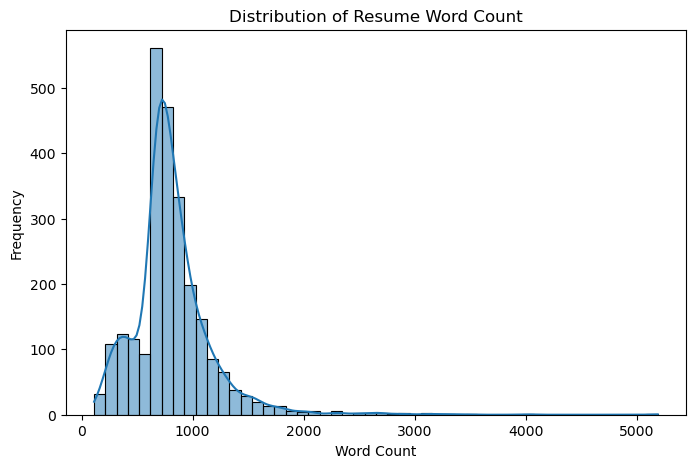

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Distribution of Resume Word Count")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

The most of the word count in a one doc is around 1000

## Label (Category) Distribution

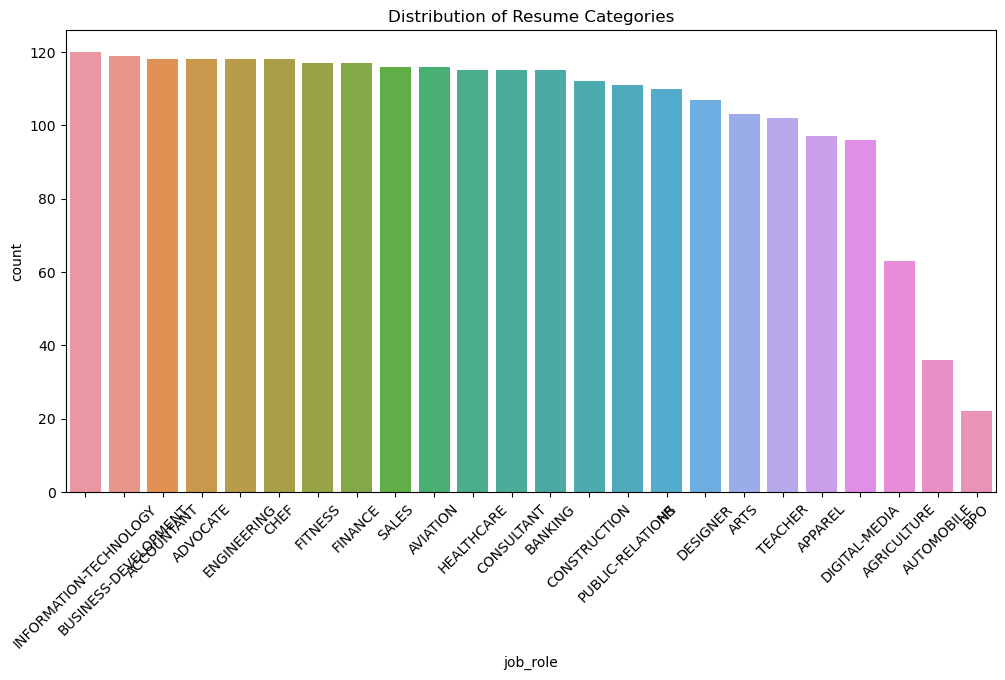

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='job_role', order=df['job_role'].value_counts().index)
plt.title("Distribution of Resume Categories")
plt.xticks(rotation=45)
plt.show()

- Information Technology ,Buisness Development,Accountant are most count in resume data with around 120 counts
- BPO,Automobile,Agriculture,digital Media low count in resume data with less than 60 

## Common Words in Resumes

In [37]:
stop_words = set(stopwords.words('english'))

def get_top_words(texts, n=15):
    all_words = " ".join(texts).lower()
    all_words = all_words.translate(str.maketrans('', '', string.punctuation)).split()
    words = [word for word in all_words if word not in stop_words]
    return Counter(words).most_common(n)

### Top Words Per Category

In [38]:
for label in df['job_role'].unique():
    top_words = get_top_words(df[df['job_role'] == label]['resume_text'], n=10)
    print(f"\nTop words in {label} resumes:")
    print(top_words)


Top words in ACCOUNTANT resumes:
[('accounting', 1207), ('financial', 1072), ('accounts', 792), ('state', 773), ('company', 719), ('city', 677), ('management', 575), ('name', 546), ('accountant', 520), ('reports', 470)]

Top words in ADVOCATE resumes:
[('state', 916), ('city', 831), ('company', 722), ('customer', 717), ('name', 620), ('service', 525), ('skills', 506), ('management', 471), ('ï¼\u200b', 414), ('sales', 330)]

Top words in AGRICULTURE resumes:
[('state', 465), ('city', 400), ('company', 339), ('name', 306), ('management', 277), ('skills', 199), ('development', 196), ('program', 171), ('education', 169), ('project', 166)]

Top words in APPAREL resumes:
[('state', 738), ('city', 728), ('company', 716), ('sales', 636), ('name', 573), ('customer', 445), ('ï¼\u200b', 417), ('product', 314), ('store', 310), ('management', 308)]

Top words in ARTS resumes:
[('state', 717), ('city', 629), ('company', 511), ('name', 456), ('arts', 432), ('students', 397), ('â', 394), ('skills', 3

## Word Cloud Visualization

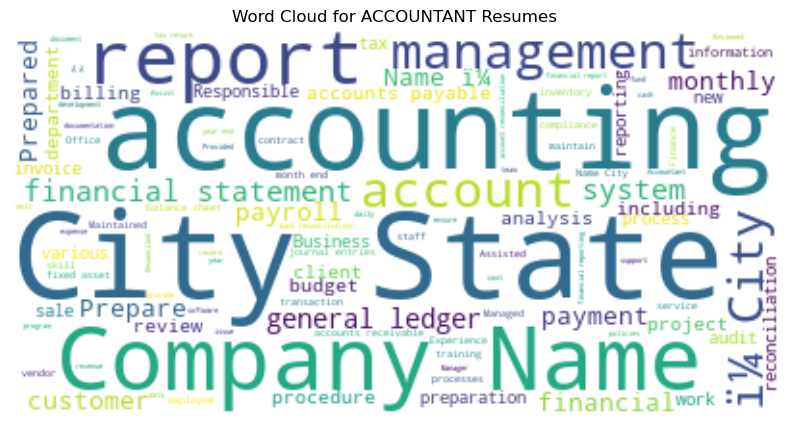

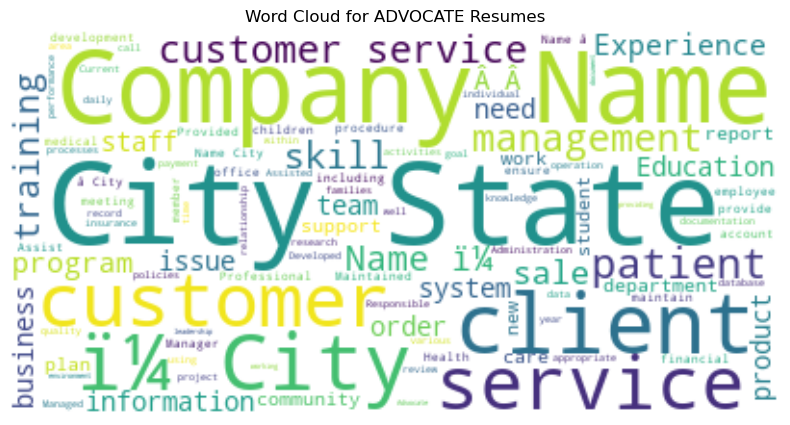

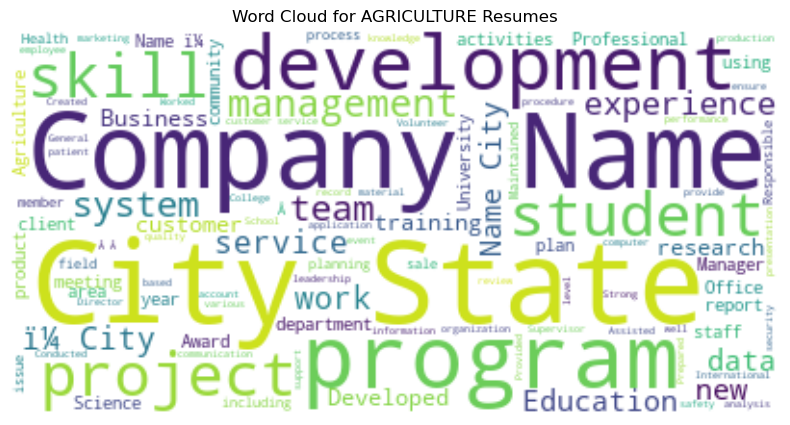

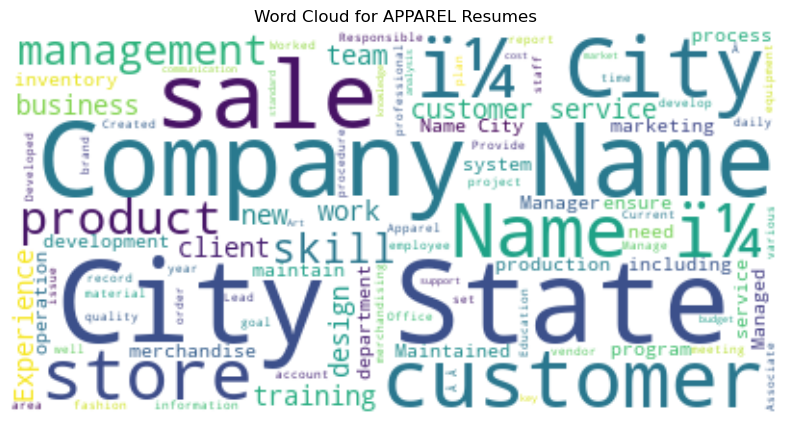

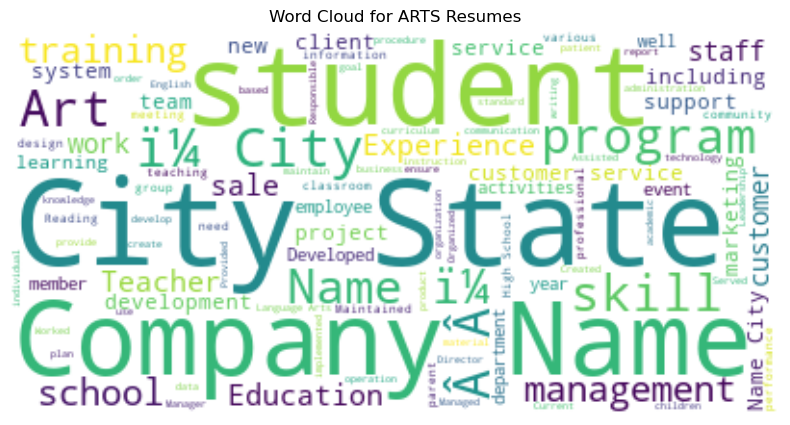

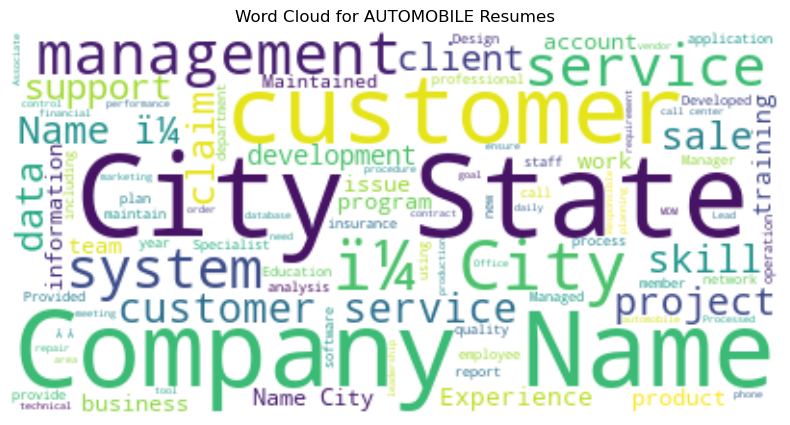

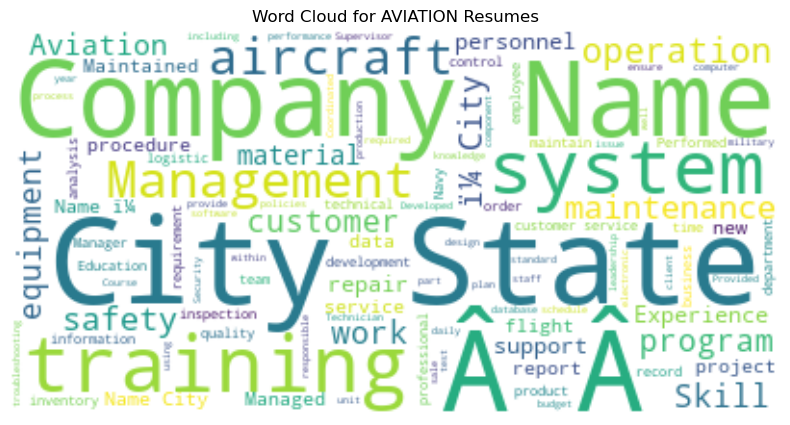

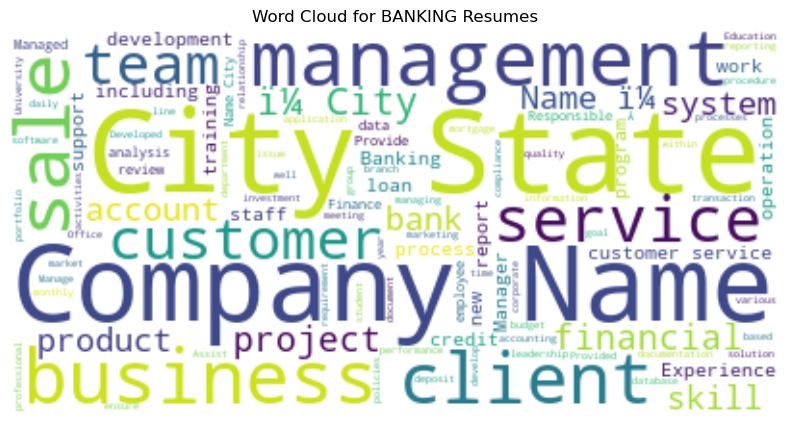

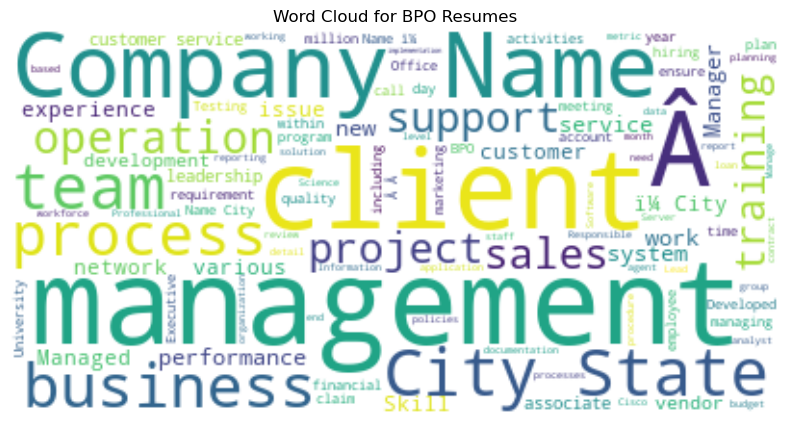

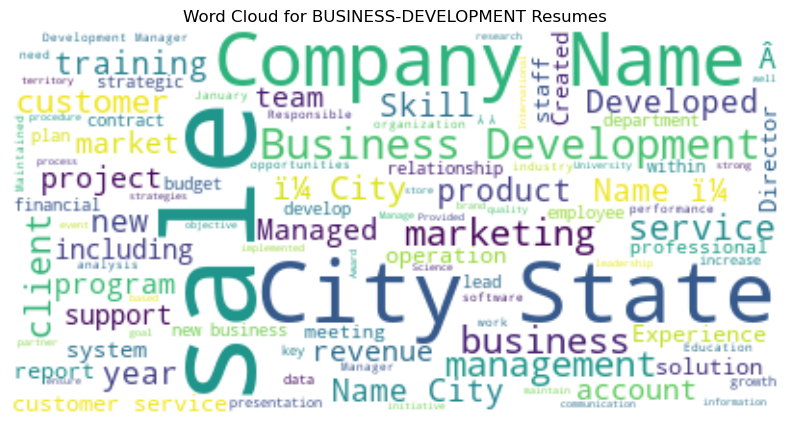

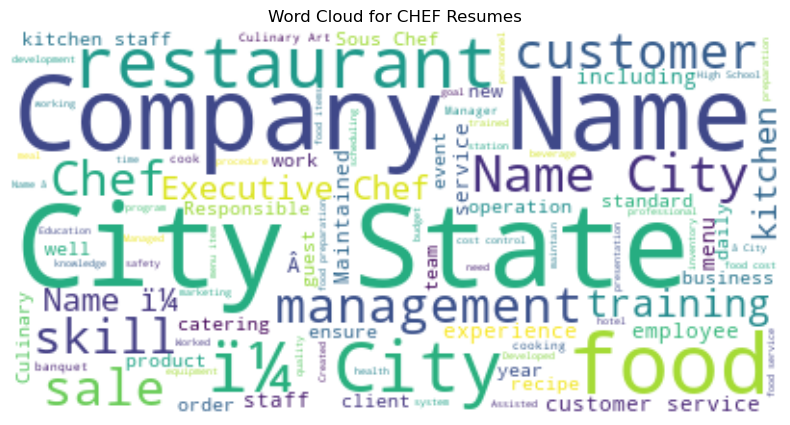

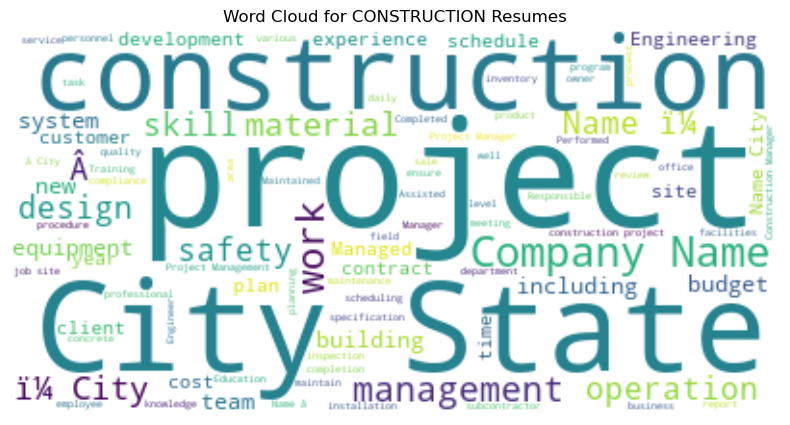

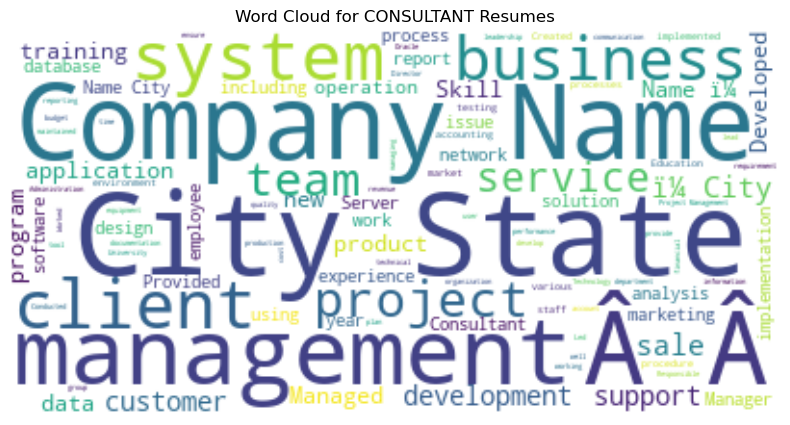

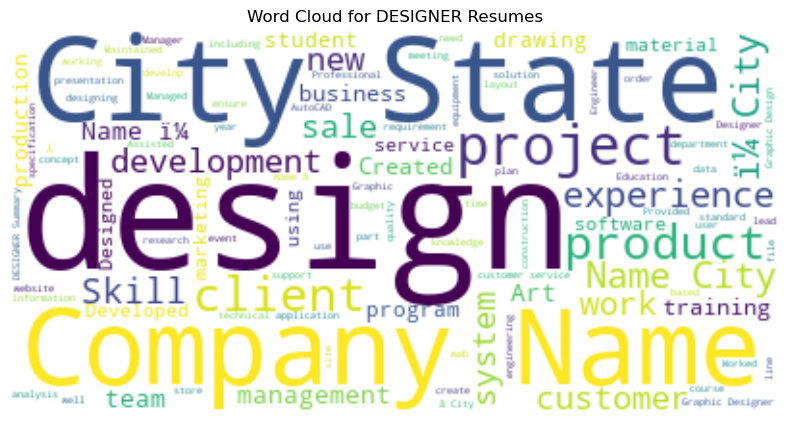

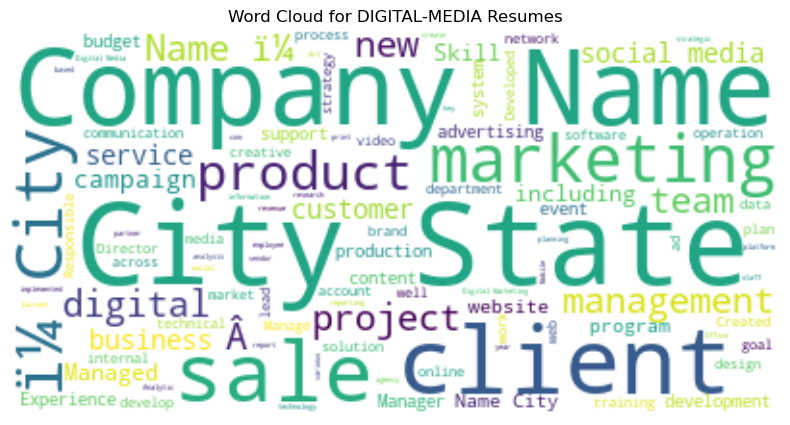

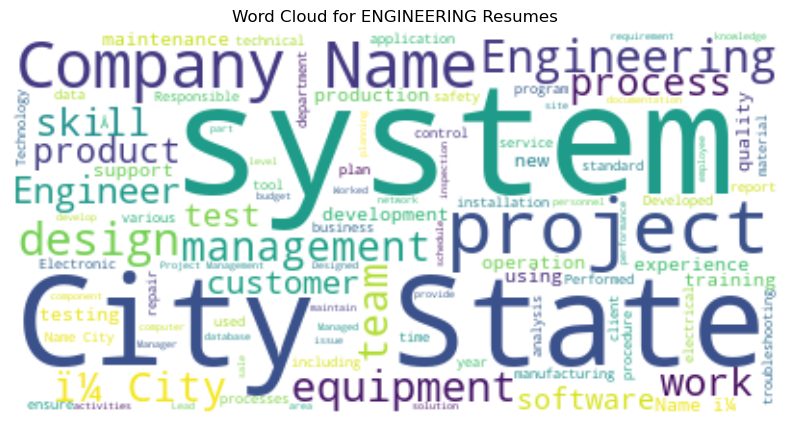

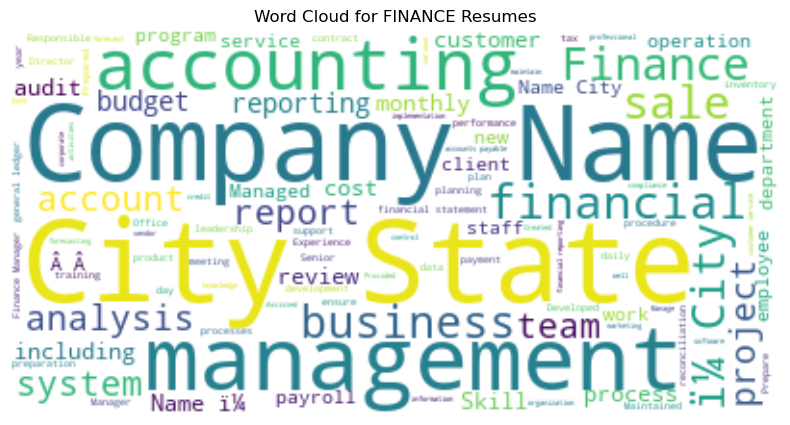

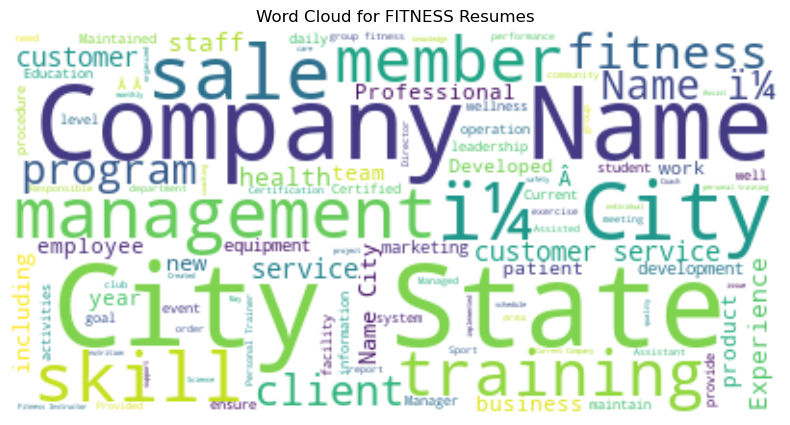

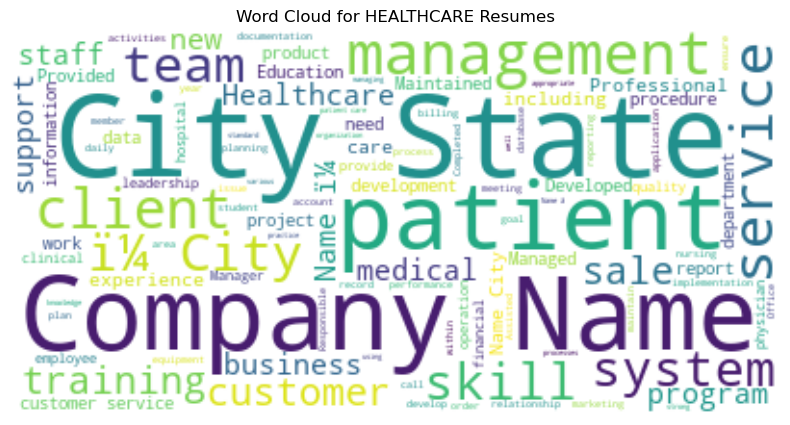

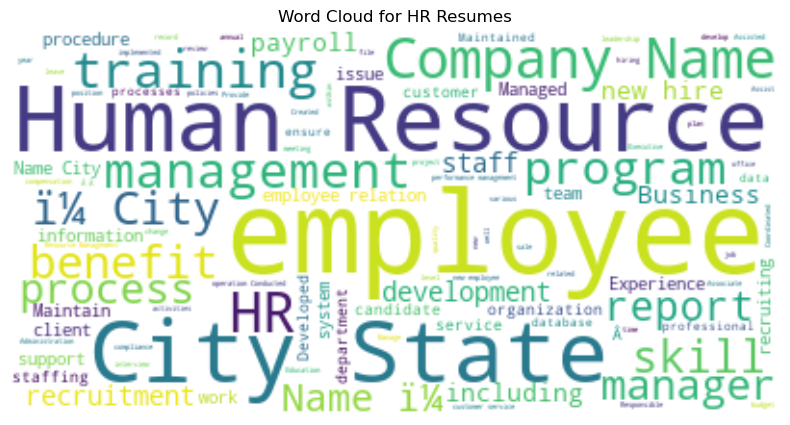

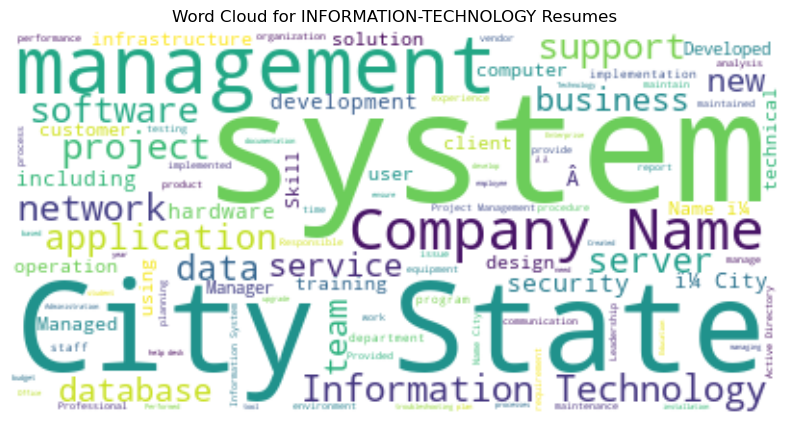

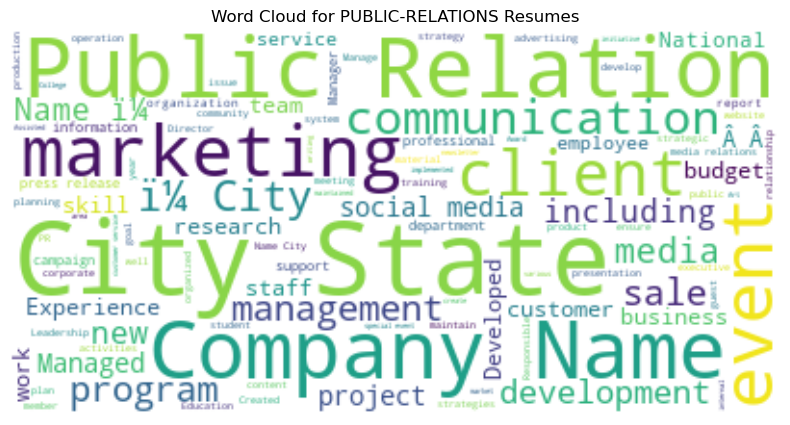

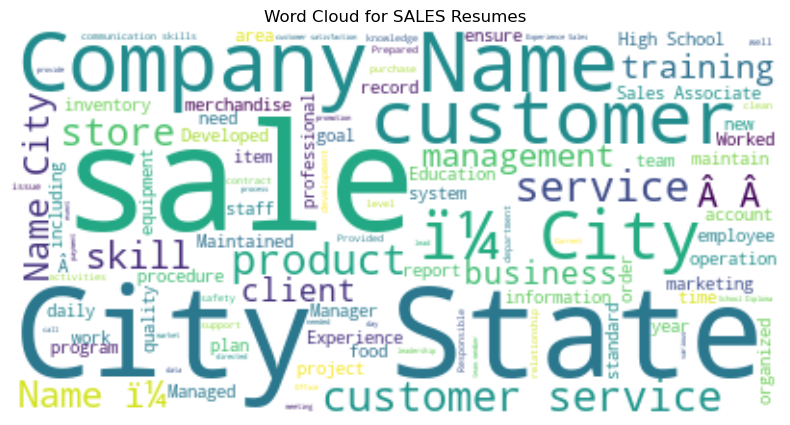

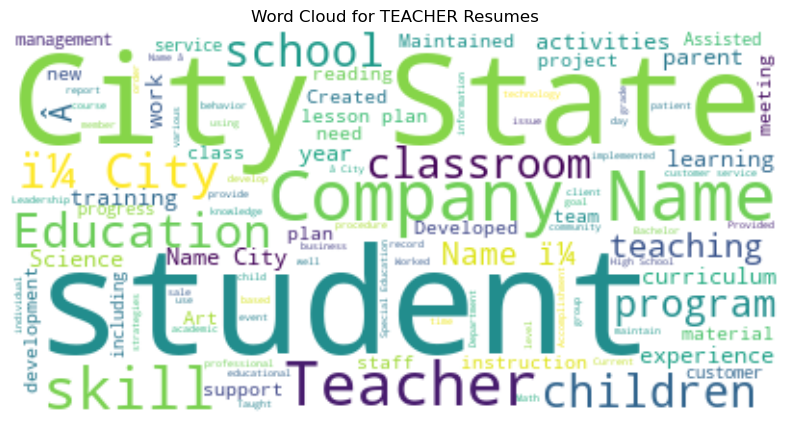

In [39]:
for label in df['job_role'].unique():
    text = " ".join(df[df['job_role'] == label]['resume_text'].dropna().astype(str))
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {label} Resumes")
    plt.axis('off')
    plt.show()

## Correlation Between Text Length and Label

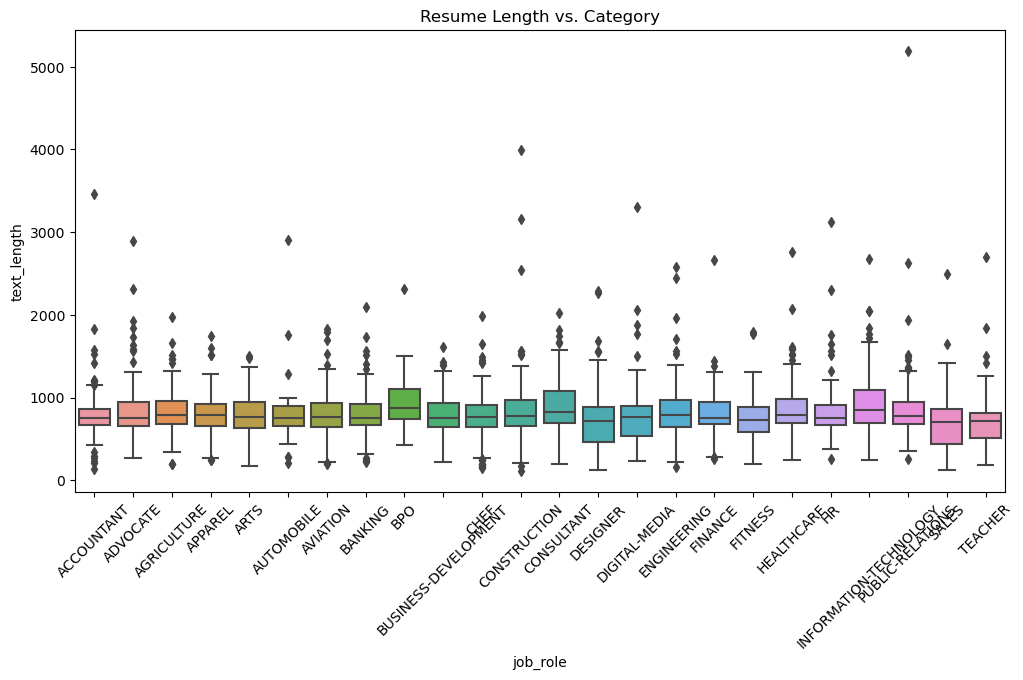

In [40]:
plt.figure(figsize=(12,6))
sns.boxplot(x='job_role', y='text_length', data=df)
plt.xticks(rotation=45)
plt.title("Resume Length vs. Category")
plt.show()


- Length Variation: Resumes for roles like Business Development, Digital Media, and Consultant are generally longer.

- Consistency in Some Roles: Resumes for Teacher and Fitness roles are more consistent in length.

- Outliers: Some resumes, especially in Engineering and Automobile, are much longer, indicating detailed experience.

## Conclusion

- **Data Overview**:
    - The dataset contains 2481 unique resumes with plain text extracted from each resume PDF, including sections like Education, Experience, Skills.
    - The target variable is job_role, with 24 unique job categories.
    - Information Technology and Business Development have the highest counts with 120 resumes each, while BPO, Automobile, and Agriculture have the          lowest counts with less than 60 resumes each.

- **Data Cleaning**:
    - Removed 2 duplicate resumes, reducing the total from 2483 to 2481 resumes.
    - Eliminated a single null entry in the resume_text column to ensure data consistency.

- **Resume Length Analysis**:
    - On average, resumes contain about 813 words and 5941 characters.
    - The shortest resume has 113 words and 692 characters, while the longest has 5190 words and 35,132 characters.
    - Most resumes fall within 653 to 937 words and 4,832 to 6,867 characters, indicating significant variation based on job category.

- **Top Keywords by Job Role**:
    - Resumes for different job roles show distinct keyword patterns, reflecting the specific skills and experiences required for each sector.
      For example, Accountant resumes often contain terms like accounting, financial, and reports, while IT resumes emphasize technology, systems, and        network.

- **overall Insights**:
    - Longer Resumes: Job roles like Business Development, Consultant, and Digital Media tend to have longer resumes, reflecting more detailed                professional experiences.
    - Consistent Length: Some roles, like Teacher and Fitness, have more consistent resume lengths, suggesting a more standardized skill set.
    - Outliers: There are significant outliers in certain roles, such as Engineering and Automobile, indicating highly detailed resumes for specialized       positions